



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART B Section I       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip "/content/gdrive/My Drive/Colab Notebooks/DL Assignment 2/data1-2.h5.zip"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/Colab Notebooks/DL Assignment 2/data1-2.h5.zip
replace data1.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Function to load Images from data1.h5 
def loadDataH5():
  with h5py.File('data1.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY = np.array(hf.get('trainY'))
    valX = np.array(hf.get('valX'))
    valY = np.array(hf.get('valY'))
    print (trainX.shape,trainY.shape)
    print (valX.shape,valY.shape)
  return trainX, trainY, valX, valY

trainX, trainY, testX, testY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


##1) CNN Model VGG16

In [3]:
import tensorflow as tf

# Importation of pre trained CNN VGG16
vggModel= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
print (vggModel.summary())

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_____

In [0]:
# A prediction is made on training data
featuresTrain= vggModel.predict(trainX)

#reshape to flatten feature data
featuresTrain= featuresTrain.reshape(featuresTrain.shape[0], -1)

#  A prediction is made on test data
featuresVal = vggModel.predict(testX)

#reshape to flatten feature data
featuresVal= featuresVal.reshape(featuresVal.shape[0], -1)



In [5]:
### Section evaluating the different ML classifer

print("### CNN Model: VGG16 ")
print("  Accuracy Evaluation of different ML classifier")


## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier(700)
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Random Forest:", metrics.accuracy_score(results, testY))



## Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Decision Tree:", metrics.accuracy_score(results, testY))



# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, p=3)
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     KNN          :", metrics.accuracy_score(results, testY))


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Naive Bayes  :", metrics.accuracy_score(results, testY))


# SVM
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     SVM          :", metrics.accuracy_score(results, testY))




### CNN Model: VGG16 
  Accuracy Evaluation of different ML classifier
     Random Forest: 0.8470588235294118
     Decision Tree: 0.4647058823529412
     KNN          : 0.7088235294117647
     Naive Bayes  : 0.4676470588235294
     SVM          : 0.7617647058823529


##2) CNN Model InceptionV3

In [6]:
### CNN model: InceptionV3

# Importation of pre trained CNN InceptionV3
InceptionV3Model= tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
print (InceptionV3Model.summary())

# A prediction is made on training data
featuresTrain= InceptionV3Model.predict(trainX)

#reshape to flatten feature data
featuresTrain= featuresTrain.reshape(featuresTrain.shape[0], -1)

# A prediction is made on test data
featuresVal = InceptionV3Model.predict(testX)

#reshape to flatten feature data
featuresVal= featuresVal.reshape(featuresVal.shape[0], -1)


87916544/87910968 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization_v1[0][0]     
____________________________________________

In [7]:
### Section evaluating the different ML classifer

print("### CNN Model: InceptionV3 ")
print("  Accuracy Evaluation of different ML classifier")


## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier(700)
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Random Forest:", metrics.accuracy_score(results, testY))



## Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Decision Tree:", metrics.accuracy_score(results, testY))



# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, p=3)
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     KNN          :", metrics.accuracy_score(results, testY))


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Naive Bayes  :", metrics.accuracy_score(results, testY))


# SVM
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     SVM          :", metrics.accuracy_score(results, testY))




### CNN Model: InceptionV3 
  Accuracy Evaluation of different ML classifier
     Random Forest: 0.8088235294117647
     Decision Tree: 0.45
     KNN          : 0.638235294117647
     Naive Bayes  : 0.6794117647058824
     SVM          : 0.8088235294117647


##3) CNN Model ResNet50

In [8]:
### CNN model: ResNet50

# Importation of pre trained CNN ResNet50
ResNet50Model= tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
print (ResNet50Model.summary())

# A prediction is made on training data
featuresTrain= ResNet50Model.predict(trainX)

#reshape to flatten feature data
featuresTrain= featuresTrain.reshape(featuresTrain.shape[0], -1)

# A prediction is made on test data
featuresVal = ResNet50Model.predict(testX)

#reshape to flatten feature data
featuresVal= featuresVal.reshape(featuresVal.shape[0], -1)


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 64, 64, 64)   256         conv1[0][0]                      
____________________________________________

In [9]:
### Section evaluating the different ML classifer

print("### CNN Model: ResNet50 ")
print("  Accuracy Evaluation of different ML classifier")


## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier(700)
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Random Forest:", metrics.accuracy_score(results, testY))



## Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Decision Tree:", metrics.accuracy_score(results, testY))



# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, p=3)
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     KNN          :", metrics.accuracy_score(results, testY))


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     Naive Bayes  :", metrics.accuracy_score(results, testY))


# SVM
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(featuresTrain, trainY)

# evaluate the model
results = model.predict(featuresVal)
print ("     SVM          :", metrics.accuracy_score(results, testY))




### CNN Model: ResNet50 
  Accuracy Evaluation of different ML classifier
     Random Forest: 0.47058823529411764
     Decision Tree: 0.2088235294117647
     KNN          : 0.3029411764705882
     Naive Bayes  : 0.20294117647058824
     SVM          : 0.04411764705882353





\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART B Section II       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

##1) Experiment1: CNN model VGG16 with SGD optimizer

In [10]:
import tensorflow as tf

# Load the ImageNet VGG model. 
# extra conv layers, dropout and softmax activation is added 

vggModel= tf.keras.applications.VGG16( weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vggModel.trainable= False
model = tf.keras.models.Sequential()
model.add(vggModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(17, activation='softmax'))

print (model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                4369      
Total params: 16,816,465
Trainable params: 2,101,777
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [11]:
# The built model is compiled with SGD optimizer
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

# The model is trained
H =model.fit(trainX, trainY, epochs=12, batch_size=51, validation_data=(testX, testY))

Train on 1020 samples, validate on 340 samples
Epoch 1/12
1020/1020 [==============================] - 8s 7ms/sample - loss: 2.8599 - acc: 0.1304 - val_loss: 2.4874 - val_acc: 0.3176
Epoch 2/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.4665 - acc: 0.2196 - val_loss: 2.1890 - val_acc: 0.3676
Epoch 3/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.2002 - acc: 0.3284 - val_loss: 1.8838 - val_acc: 0.5706
Epoch 4/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 1.9739 - acc: 0.3990 - val_loss: 1.7334 - val_acc: 0.5353
Epoch 5/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 1.7838 - acc: 0.4539 - val_loss: 1.4648 - val_acc: 0.6676
Epoch 6/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 1.6250 - acc: 0.4990 - val_loss: 1.3762 - val_acc: 0.6971
Epoch 7/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 1.5200 - acc: 0.5373 - val_loss: 1.2268 - val_acc: 0.7118
E

In [12]:
# Prediction on test data
result_predictions = model.predict(testX)
# select the class with the highest value
predictions = np.argmax(result_predictions, axis=1)
# Check if the model prediction is correct (True if prediction correct, False otherwise)
correct = np.equal(predictions, testY)
# Conversion of the boolean array into a numerical array (1 if True, 0 if False)
pred_correct = correct.astype(np.float32)
# mean value of predictions_correct
accuracy = np.mean(pred_correct)
print("CNN model VGG16, SGD optimizer accuracy:",accuracy)

CNN model VGG16, SGD optimizer accuracy: 0.7970588


##2) Experiment2: CNN model VGG16 with Nadam optimizer

In [13]:
# The model is now compiled with Nadam optimizer
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Nadam(lr=0.001),
              metrics=['accuracy'])

# The model is trained
H =model.fit(trainX, trainY, epochs=12, batch_size=51, validation_data=(testX, testY))

Train on 1020 samples, validate on 340 samples
Epoch 1/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 1.2421 - acc: 0.6245 - val_loss: 0.6602 - val_acc: 0.8324
Epoch 2/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.6391 - acc: 0.8049 - val_loss: 0.5196 - val_acc: 0.8765
Epoch 3/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.3733 - acc: 0.8902 - val_loss: 0.4505 - val_acc: 0.8765
Epoch 4/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.2295 - acc: 0.9402 - val_loss: 0.4263 - val_acc: 0.8588
Epoch 5/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.1827 - acc: 0.9520 - val_loss: 0.3815 - val_acc: 0.8706
Epoch 6/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.1322 - acc: 0.9735 - val_loss: 0.4494 - val_acc: 0.8559
Epoch 7/12
1020/1020 [==============================] - 3s 3ms/sample - loss: 0.0913 - acc: 0.9873 - val_loss: 0.3651 - val_acc: 0.8853
E

In [14]:
# Prediction on test data
result_predictions = model.predict(testX)
# select the class with the highest value
predictions = np.argmax(result_predictions, axis=1)
# Check if the model prediction is correct (True if prediction correct, False otherwise)
correct = np.equal(predictions, testY)
# Conversion of the boolean array into a numerical array (1 if True, 0 if False)
pred_correct = correct.astype(np.float32)
# mean value of predictions_correct
accuracy = np.mean(pred_correct)
print("CNN model VGG16, Nadam optimizer:",accuracy)

CNN model VGG16, Nadam optimizer: 0.89117646


##3) Experiment3: VGG16 Fine-tuning from block4 

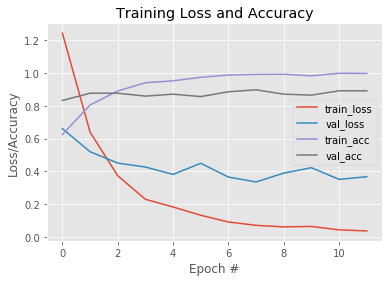

In [15]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 12), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 12), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 12), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 12), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [16]:
### In this section we start with the fine-tuning

# the VGG16 is now unfrozen and is ready to be trained 
vggModel.trainable= True

# Initilize the trainable flag to false
trainableFlag= False

# a loop goes through each layer of VGG16
for layer in vggModel.layers:
  # It checks if the layer name is block4_conv1
  if layer.name== 'block4_conv1':
    # when the specified layer name is found, the trainable flag is set to True
    # This means that all layers from the specified layer could be trained
    trainableFlag= True
  layer.trainable= trainableFlag

# The model is compiled with the Nadam optimizer with a very low learning rate  
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Nadam(lr=1e-5),metrics=['accuracy'])

# The model is trained
H =model.fit(trainX, trainY, epochs=60, batch_size=51, validation_data=(testX, testY))
    


Train on 1020 samples, validate on 340 samples
Epoch 1/60
1020/1020 [==============================] - 5s 5ms/sample - loss: 0.0178 - acc: 0.9980 - val_loss: 0.3691 - val_acc: 0.9029
Epoch 2/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0163 - acc: 0.9971 - val_loss: 0.3937 - val_acc: 0.8941
Epoch 3/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0095 - acc: 0.9990 - val_loss: 0.3935 - val_acc: 0.9000
Epoch 4/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0074 - acc: 0.9980 - val_loss: 0.4165 - val_acc: 0.8765
Epoch 5/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0118 - acc: 0.9971 - val_loss: 0.4935 - val_acc: 0.8735
Epoch 6/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0170 - acc: 0.9951 - val_loss: 0.4153 - val_acc: 0.8765
Epoch 7/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0110 - acc: 0.9971 - val_loss: 0.3822 - val_acc: 0.9000
E

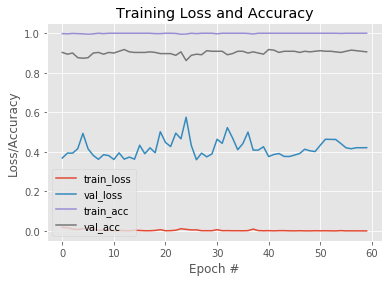

In [17]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 60), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 60), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 60), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 60), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##4) Experiment4: VGG16 Fine-tuning from block3

In [18]:
### In this section we start with the fine-tuning

# the VGG16 is now unfrozen and is ready to be trained 
vggModel.trainable= True

# Initilize the trainable flag to false
trainableFlag= False

# a loop goes through each layer of VGG16
for layer in vggModel.layers:
  # It checks if the layer name is block3_conv1
  if layer.name== 'block3_conv1':
    # when the specified layer name is found, the trainable flag is set to True
    # This means that all layers from the specified layer could be trained
    trainableFlag= True
  layer.trainable= trainableFlag

# The model is compiled with the Nadam optimizer with a very low learning rate  
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Nadam(lr=1e-5),metrics=['accuracy'])

# The model is trained
H =model.fit(trainX, trainY, epochs=60, batch_size=51, validation_data=(testX, testY))


Train on 1020 samples, validate on 340 samples
Epoch 1/60
1020/1020 [==============================] - 6s 6ms/sample - loss: 0.0019 - acc: 0.9990 - val_loss: 0.5420 - val_acc: 0.8971
Epoch 2/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4476 - val_acc: 0.9147
Epoch 3/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0142 - acc: 0.9961 - val_loss: 0.5482 - val_acc: 0.8853
Epoch 4/60
1020/1020 [==============================] - 4s 4ms/sample - loss: 0.0032 - acc: 0.9990 - val_loss: 0.4417 - val_acc: 0.9000
Epoch 5/60
1020/1020 [==============================] - 5s 4ms/sample - loss: 0.0045 - acc: 0.9980 - val_loss: 0.3933 - val_acc: 0.9206
Epoch 6/60
1020/1020 [==============================] - 5s 4ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4531 - val_acc: 0.9176
Epoch 7/60
1020/1020 [==============================] - 5s 4ms/sample - loss: 5.7153e-04 - acc: 1.0000 - val_loss: 0.4804 - val_acc: 0.91

In [19]:
# Prediction on test data
result_predictions = model.predict(testX)
# select the class with the highest value
predictions = np.argmax(result_predictions, axis=1)
# Check if the model prediction is correct (True if prediction correct, False otherwise)
correct = np.equal(predictions, testY)
# Conversion of the boolean array into a numerical array (1 if True, 0 if False)
pred_correct = correct.astype(np.float32)
# mean value of predictions_correct
accuracy = np.mean(pred_correct)
print("CNN model VGG16, Nadam optimizer:")
print("  Fine-tuning using Nadam optimiser from block3_conv1")
print("  Accuracy after fine-tuning:", accuracy)

CNN model VGG16, Nadam optimizer:
  Fine-tuning using Nadam optimiser from block3_conv1
  Accuracy after fine-tuning: 0.9264706


##5) Experiment5: CNN model InceptionV3 with Nadam optimizer

In [20]:
import tensorflow as tf

# Load the ImageNet VGG model. 
# extra conv layers, dropout and softmax activation is added 

InceptionV3Model= tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
InceptionV3Model.trainable= False
modelinc = tf.keras.models.Sequential()
modelinc.add(InceptionV3Model)
modelinc.add(tf.keras.layers.Flatten())
modelinc.add(tf.keras.layers.Dense(256, activation='relu'))
modelinc.add(tf.keras.layers.Dropout(0.5))
modelinc.add(tf.keras.layers.Dense(17, activation='softmax'))

print (modelinc.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                4369      
Total params: 23,904,561
Trainable params: 2,101,777
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [21]:
# The built model is compiled with Nadam optimizer
modelinc.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Nadam(lr=0.001),
              metrics=['accuracy'])

# The model is trained
H =modelinc.fit(trainX, trainY, epochs=50, batch_size=51, validation_data=(testX, testY))


Train on 1020 samples, validate on 340 samples
Epoch 1/50
1020/1020 [==============================] - 6s 6ms/sample - loss: 3.1961 - acc: 0.1157 - val_loss: 2.8713 - val_acc: 0.1353
Epoch 2/50
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.4405 - acc: 0.2578 - val_loss: 2.4652 - val_acc: 0.3147
Epoch 3/50
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.1533 - acc: 0.3441 - val_loss: 1.8106 - val_acc: 0.4588
Epoch 4/50
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.7895 - acc: 0.4637 - val_loss: 1.6322 - val_acc: 0.5088
Epoch 5/50
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.4976 - acc: 0.5490 - val_loss: 1.4198 - val_acc: 0.5412
Epoch 6/50
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.3424 - acc: 0.5902 - val_loss: 1.1416 - val_acc: 0.6529
Epoch 7/50
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.2011 - acc: 0.6284 - val_loss: 1.3930 - val_acc: 0.6029
E

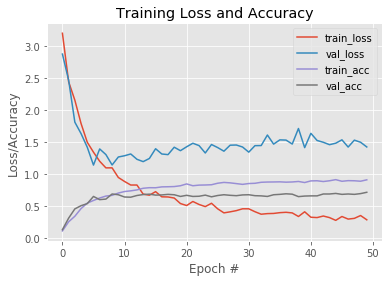

In [22]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [23]:
# Prediction on test data
result_predictions = modelinc.predict(testX)
# select the class with the highest value
predictions = np.argmax(result_predictions, axis=1)
# Check if the model prediction is correct (True if prediction correct, False otherwise)
correct = np.equal(predictions, testY)
# Conversion of the boolean array into a numerical array (1 if True, 0 if False)
pred_correct = correct.astype(np.float32)
# mean value of predictions_correct
accuracy = np.mean(pred_correct)
print("CNN model InceptionV3, Nadam optimizer:",accuracy)

CNN model InceptionV3, Nadam optimizer: 0.7176471
